<a href="https://colab.research.google.com/github/ANILPRASAD16/CodeClause-Internship---Brain-Tumor-Detection-with-Data-Science/blob/main/Brain_Tumor_Detection_with_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anilprasadm","key":"92617d3ca031aa343826fff3eb37e1d9"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                               29MB  2023-11-16 01:38:36           1608        162  1.0              
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data                       763KB  2023-11-21 17:56:32           7233        129  1.0              
derrekdevon/real-estate-sales-2001-2020                Real Estate Sales 2001-2020                          28MB  2023-12-07 15:36:26            738         22  1.0              
thedevastator/netflix-imdb-scores                      Netflix IMDB Scores                               

In [ ]:
! kaggle datasets download -d preetviradiya/brian-tumor-dataset

 88% 94.0M/107M [00:00<00:00, 97.3MB/s]
100% 107M/107M [00:01<00:00, 104MB/s]  


In [ ]:
! unzip brian-tumor-dataset.zip

Archive:  brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumo

In [ ]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install fastai

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


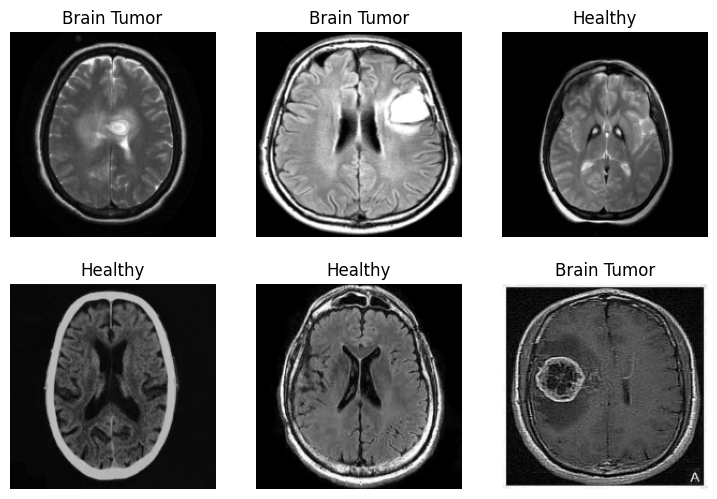

In [ ]:
from fastai.vision.all import *
path = Path('/content/Brain Tumor Data Set/Brain Tumor Data Set') #/content/Brain Tumor Data Set/Brain Tumor Data Set
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 145MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.451470,0.183437,0.066304,05:45


epoch,train_loss,valid_loss,error_rate,time
0,0.161417,0.073731,0.020652,08:25
1,0.071600,0.035110,0.009783,08:26
2,0.017165,0.030651,0.008696,08:27


In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [19]:
pathHealthy = Path('/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1001).jpg')
pathTumor = Path('/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg')

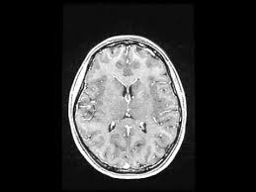

In [20]:
imgHealthy = PILImage.create(pathHealthy)
imgHealthy.to_thumb(256,256)

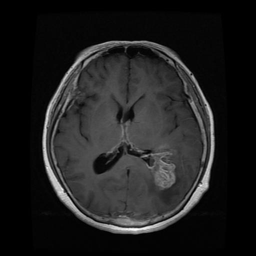

In [21]:
imgTumor = PILImage.create(pathTumor)
imgTumor.to_thumb(256,256)

In [22]:
is_cancer,_,probs = learn.predict(imgHealthy)
print(f"Brain tumor or healthy?: {is_cancer}.")
print(f"Probability it's not cancer: {probs[1].item():.6f}")

Brain tumor or healthy?: Healthy.
Probability it's not cancer: 0.999999


In [23]:
is_cancer,_,probs = learn.predict(imgTumor)
print(f"Brain tumor or healthy?: {is_cancer}.")
print(f"Probability it's not cancer: {probs[1].item():.6f}")

Brain tumor or healthy?: Brain Tumor.
Probability it's not cancer: 0.020373
